# **Data Preprocessing**

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading excel file
df = pd.read_excel("House_Rent_Train.xlsx")
# top five rows
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [3]:
# bottom five rows
df.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20554,23,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# The dataset contains 20555 rows and 25 columns
df.shape

(20555, 25)

In [5]:
# columns or features
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

# Checking for Missing Values

In [6]:
print(round(df.isna().sum()/df.shape[0]*100, 2))

id                 0.00
type               0.13
locality           0.78
activation_date    0.11
latitude           0.11
longitude          0.11
lease_type         0.11
gym                0.00
lift               0.00
swimming_pool      0.00
negotiable         0.00
furnishing         0.00
parking            0.00
property_size      0.00
property_age       0.11
bathroom           0.11
facing             0.11
cup_board          0.11
floor              0.11
total_floor        0.11
amenities          0.11
water_supply       0.11
building_type      0.11
balconies          0.11
rent               0.11
dtype: float64


In [7]:
# as the columns have less than one percentage missing values.so, dropping those rows
df.dropna(inplace = True)

In [8]:
# after removing missing values
df.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

# Checking for Duplicates

In [9]:
df.duplicated().sum()

20

In [10]:
# Dropping those duplicated rows
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.reset_index(drop =True, inplace = True)

In [13]:
# Info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20357 entries, 0 to 20356
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20357 non-null  object 
 1   type             20357 non-null  object 
 2   locality         20357 non-null  object 
 3   activation_date  20357 non-null  object 
 4   latitude         20357 non-null  float64
 5   longitude        20357 non-null  float64
 6   lease_type       20357 non-null  object 
 7   gym              20357 non-null  int64  
 8   lift             20357 non-null  int64  
 9   swimming_pool    20357 non-null  int64  
 10  negotiable       20357 non-null  int64  
 11  furnishing       20357 non-null  object 
 12  parking          20357 non-null  object 
 13  property_size    20357 non-null  int64  
 14  property_age     20357 non-null  float64
 15  bathroom         20357 non-null  float64
 16  facing           20357 non-null  object 
 17  cup_board   

# Feature Engineering

activation_date feature

In [14]:
# Converting datatype of activation date column to datetime type
df["activation_date"] = pd.to_datetime(df.loc[:, "activation_date"])

In [15]:
# splitting activation column in to three features(year, month, day) 
df["activation_date_year"] = df.loc[:, "activation_date"].dt.year
df["activation_date_month"] = df.loc[:, "activation_date"].dt.month
df["activation_date_day"] = df.loc[:, "activation_date"].dt.day

amenities feature

In [16]:
df["amenities"].unique()

array(['{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}',
       '{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":true,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":true}',
       '{"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}',
       ...,
       '{"LIFT":true,"GYM":false,"INTERNET":true,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":false

In [17]:
# splitting amenities feature based on unique values

In [18]:
s = {'LIFT':[], 'GYM':[], 'INTERNET':[], 'AC':[], 'CLUB':[], 'INTERCOM':[], 'POOL':[], 'CPA':[], 'FS':[], 'SERVANT':[], 
     'SECURITY':[], 'SC':[], 'GP':[], 'PARK':[], 'RWH':[], 'STP':[], 'HK':[], 'PB':[], 'VP':[]}

for row in df["amenities"].values:
    i = json.loads(row)
    s["LIFT"].append(i.get("LIFT", False))
    s["GYM"].append(i.get("GYM", False))
    s["INTERNET"].append(i.get("INTERNET", False))
    s["AC"].append(i.get("AC", False))
    s["CLUB"].append(i.get("CLUB", False))
    s["INTERCOM"].append(i.get("INTERCOM", False))
    s["POOL"].append(i.get("POOL", False))
    s["CPA"].append(i.get("CPA", False))
    s["FS"].append(i.get("FS", False))
    s["SERVANT"].append(i.get("SERVANT", False))
    s["SECURITY"].append(i.get("SECURITY", False))
    s["SC"].append(i.get("SC", False))
    s["GP"].append(i.get("GP", False))
    s["PARK"].append(i.get("PARK", False))
    s["RWH"].append(i.get("RWH", False))
    s["STP"].append(i.get("STP", False))
    s["HK"].append(i.get("HK", False))
    s["PB"].append(i.get("PB", False))
    s["VP"].append(i.get("VP", False))
    

In [19]:
amenities_df = pd.DataFrame(s)
for i in amenities_df.columns:
    amenities_df[f"{i}"] = amenities_df[f"{i}"].map({True: 1, False: 0})
amenities_df

,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,POOL,CPA,FS,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1
1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1
20353,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
20354,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
20355,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,1,1


In [20]:
# concatenating this with the original dataframe
df = pd.concat([df, amenities_df], axis = 1)
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,0,1,1,0,1,1,1,0,1,1
1,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,0,0,1,0,1,0,0,0,1,1
2,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",2017-10-24 18:29:00,12.986196,77.718314,FAMILY,1,1,1,...,0,1,0,0,0,0,0,0,1,0


type feature

In [21]:
df["type"].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [22]:
# converting lowercase characters to upper case
df["type"] = df["type"].replace("1BHK1", "BHK1").replace("bhk2", "BHK2").replace("bhk3", "BHK3")

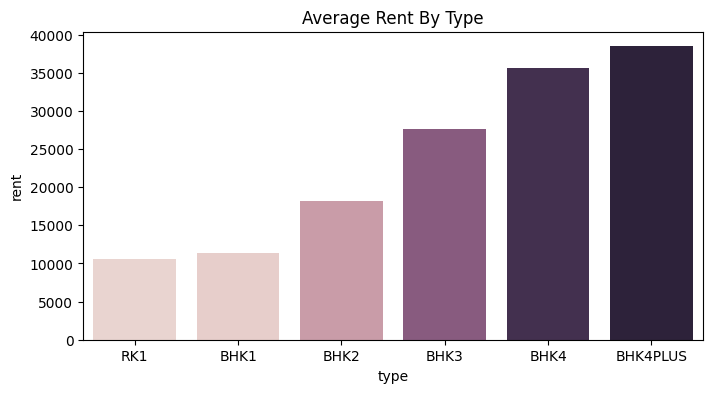

In [23]:
type = df.groupby("type")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.title('Average Rent By Type')
plt.show()

In [24]:
# encoding categorical feature to numerical feature by mapping
df["type_encode"] = df["type"].map({"RK1": 1, "BHK1": 2, "BHK2": 3, "BHK3": 4, "BHK4": 5, "BHK4PLUS":6 })

locality feature

In [25]:
df["locality"].unique()

array(['Bellandur', 'Thiruvanmiyur', 'Attiguppe', ...,
       'Reliance Fresh, Whitefield Main Road, Industrial Area, Whitefield',
       'Koramangala 4th block',
       'Mahadevapura bus stop, Mahadevapura, Bengaluru, Karnataka, India'],
      dtype=object)

In [26]:
df["locality"].nunique()

1917

In [27]:
# using label encoding for encoding locality feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["locality_encode"] = le.fit_transform(df["locality"])

lease_type feature

In [28]:
df["lease_type"].unique()

array(['ANYONE', 'FAMILY', 'BACHELOR', 'COMPANY'], dtype=object)

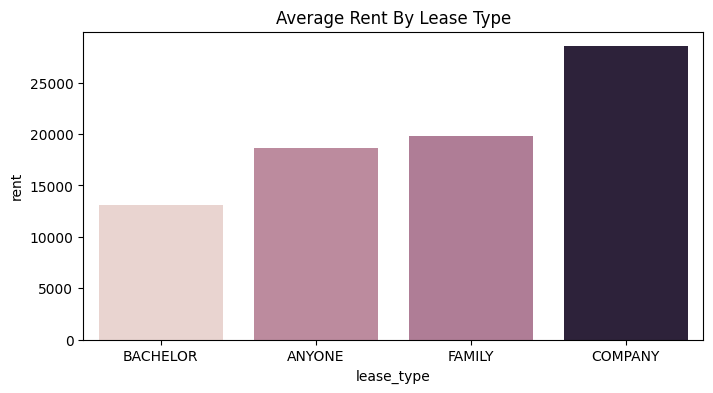

In [29]:
lease_type = df.groupby("lease_type")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = lease_type.index, y = lease_type, hue = lease_type, legend = False)
plt.title('Average Rent By Lease Type')
plt.show()

In [30]:
df["lease_type"] = df["lease_type"].map({"BACHELOR": 1, "ANYONE": 2, "FAMILY": 3, "COMPANY": 4 })

furnishing feature

In [31]:
df["furnishing"].unique()

array(['SEMI_FURNISHED', 'FULLY_FURNISHED', 'NOT_FURNISHED'], dtype=object)

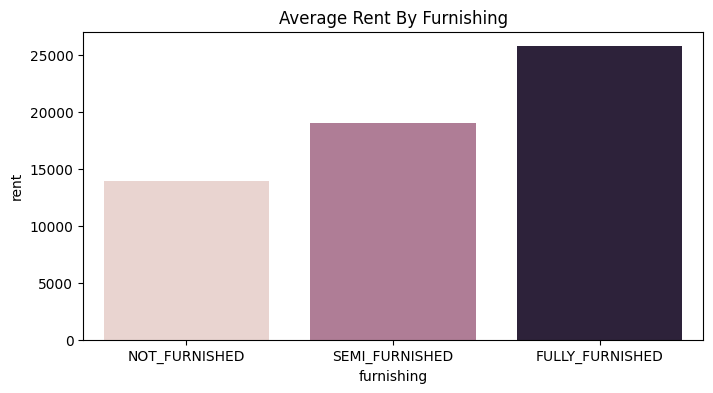

In [32]:
furnishing = df.groupby("furnishing")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = furnishing.index, y = furnishing, hue = furnishing, legend = False)
plt.title('Average Rent By Furnishing')
plt.show()

In [33]:
df["furnishing"] = df["furnishing"].map({"NOT_FURNISHED": 1, "SEMI_FURNISHED": 2, "FULLY_FURNISHED": 3})

parking feature

In [34]:
df["parking"].unique()

array(['BOTH', 'TWO_WHEELER', 'NONE', 'FOUR_WHEELER'], dtype=object)

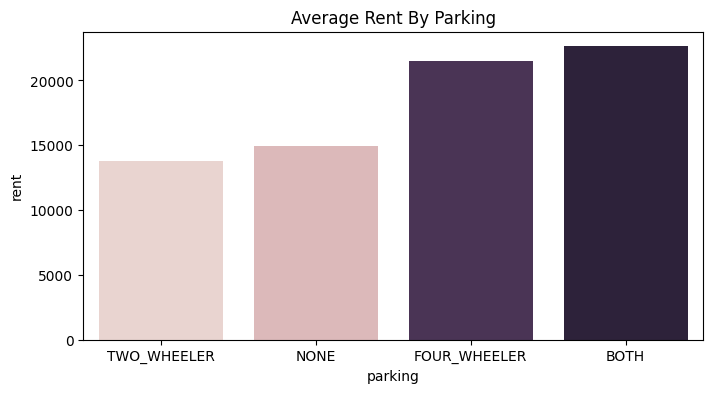

In [35]:
parking = df.groupby("parking")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = parking.index, y = parking, hue = parking, legend = False)
plt.title('Average Rent By Parking')
plt.show()

In [36]:
df["parking"] = df["parking"].map({"NONE": 1, "TWO_WHEELER": 2, "FOUR_WHEELER": 3, "BOTH": 4  })

facing feature

In [37]:
df["facing"].unique()

array(['NE', 'E', 'S', 'N', 'SE', 'W', 'NW', 'SW'], dtype=object)

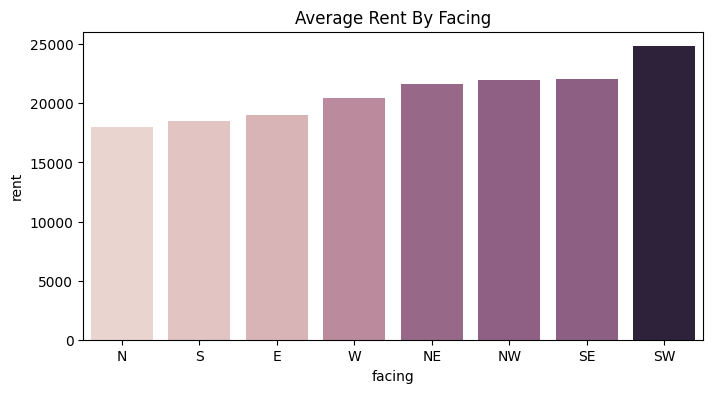

In [38]:
facing = df.groupby("facing")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = facing.index, y = facing, hue = facing, legend = False)
plt.title('Average Rent By Facing')
plt.show()

In [39]:
df["facing"] = df["facing"].map({"N": 1, "S": 2, "E": 3, "W": 4, "NE": 5, "NW": 6, "SE": 7, "SW": 8})

water_supply feature

In [40]:
df["water_supply"].unique()

array(['CORPORATION', 'CORP_BORE', 'BOREWELL'], dtype=object)

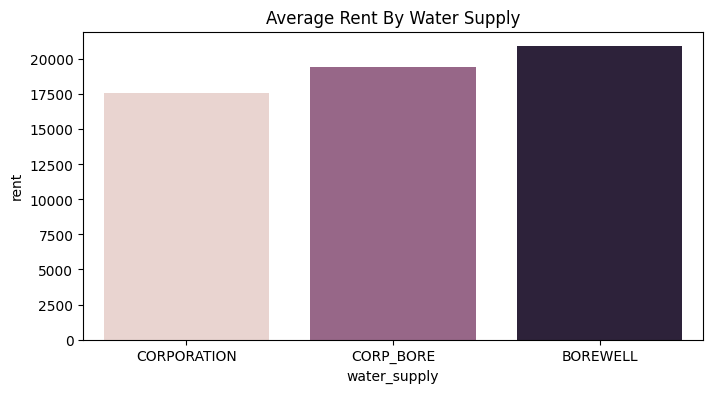

In [41]:
water_supply = df.groupby("water_supply")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = water_supply.index, y = water_supply, hue = water_supply, legend = False)
plt.title('Average Rent By Water Supply')
plt.show()

In [42]:
df["water_supply"] = df["water_supply"].map({"CORPORATION": 1, "CORP_BORE": 2, "BOREWELL": 3})

building_type feature

In [43]:
df["building_type"].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

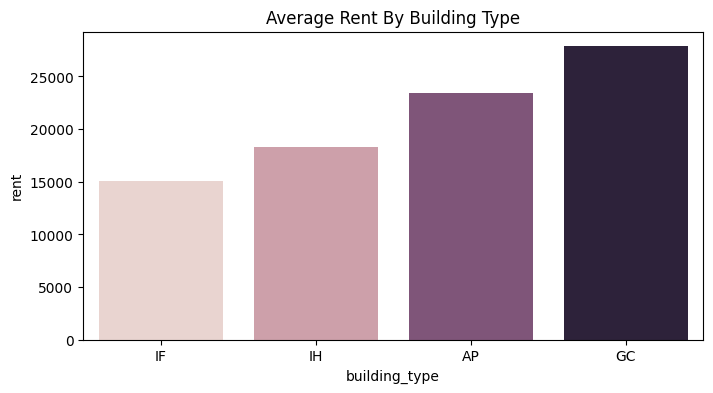

In [44]:
building_type = df.groupby("building_type")["rent"].mean().sort_values(ascending = True) 

plt.figure(figsize = (8,4))
sns.barplot(x = building_type.index, y = building_type, hue = building_type, legend = False)
plt.title('Average Rent By Building Type')
plt.show()

In [45]:
df["building_type"] = df["building_type"].map({"IF": 1, "IH": 2, "AP": 3, "GC": 4})

In [46]:
# dropping unnecessary columns
df.drop(columns = ["id", "activation_date", "gym", "lift", "swimming_pool"], inplace = True)

# Data Types

In [47]:
df.dtypes

type                      object
locality                  object
latitude                 float64
longitude                float64
lease_type                 int64
negotiable                 int64
furnishing                 int64
parking                    int64
property_size              int64
property_age             float64
bathroom                 float64
facing                     int64
cup_board                float64
floor                    float64
total_floor              float64
amenities                 object
water_supply               int64
building_type              int64
balconies                float64
rent                     float64
activation_date_year       int32
activation_date_month      int32
activation_date_day        int32
LIFT                       int64
GYM                        int64
INTERNET                   int64
AC                         int64
CLUB                       int64
INTERCOM                   int64
POOL                       int64
CPA       

# Correlation

In [48]:
cor = df.corr(numeric_only = True)
cor

,latitude,longitude,lease_type,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,...,SC,GP,PARK,RWH,STP,HK,PB,VP,type_encode,locality_encode
latitude,1.000000,0.194260,-0.000809,-0.009860,-0.012273,-0.000961,0.006745,0.029746,-0.007255,0.025379,...,-0.008557,-0.028024,-0.019526,0.021228,0.032924,0.009124,0.042120,0.026117,-0.004471,0.249948
longitude,0.194260,1.000000,-0.041676,-0.023936,0.073148,0.156094,0.075325,-0.136052,0.096204,0.051049,...,-0.010144,0.055922,0.069906,0.160149,0.182159,0.179915,0.255793,0.187150,0.015507,0.114677
lease_type,-0.000809,-0.041676,1.000000,-0.021130,-0.016992,0.130498,0.144157,0.010163,0.159476,0.016252,...,-0.042078,0.024469,-0.015942,0.030996,0.005050,0.014602,0.073600,0.024674,0.219551,0.023889
negotiable,-0.009860,-0.023936,-0.021130,1.000000,-0.001660,0.061387,0.054028,0.039332,0.059940,0.010126,...,0.039580,0.031983,0.042619,0.040114,0.023017,0.025534,0.026766,0.038083,0.078472,-0.010730
furnishing,-0.012273,0.073148,-0.016992,-0.001660,1.000000,0.186291,0.134518,-0.095481,0.152221,0.039428,...,0.000985,0.098268,0.062141,0.128088,0.105499,0.152789,0.226175,0.124334,0.093983,0.009857
parking,-0.000961,0.156094,0.130498,0.061387,0.186291,1.000000,0.384215,-0.106331,0.453192,0.097045,...,-0.023844,0.156741,0.112175,0.279936,0.224179,0.303944,0.493848,0.315037,0.404310,0.072237
property_size,0.006745,0.075325,0.144157,0.054028,0.134518,0.384215,1.000000,-0.008820,0.593615,0.073827,...,-0.022951,0.132434,0.079367,0.196807,0.173837,0.200508,0.331035,0.220592,0.606284,0.040453
property_age,0.029746,-0.136052,0.010163,0.039332,-0.095481,-0.106331,-0.008820,1.000000,-0.047629,0.013963,...,0.001134,-0.128376,-0.049587,-0.114384,-0.113960,-0.116308,-0.167755,-0.127286,0.032148,-0.063045
bathroom,-0.007255,0.096204,0.159476,0.059940,0.152221,0.453192,0.593615,-0.047629,1.000000,0.090731,...,-0.015482,0.152307,0.097120,0.218384,0.197199,0.223327,0.382195,0.248874,0.741489,0.036596
facing,0.025379,0.051049,0.016252,0.010126,0.039428,0.097045,0.073827,0.013963,0.090731,1.000000,...,-0.006090,0.037068,0.045150,0.055915,0.077343,0.085629,0.123356,0.078099,0.077969,0.015308


<Axes: >

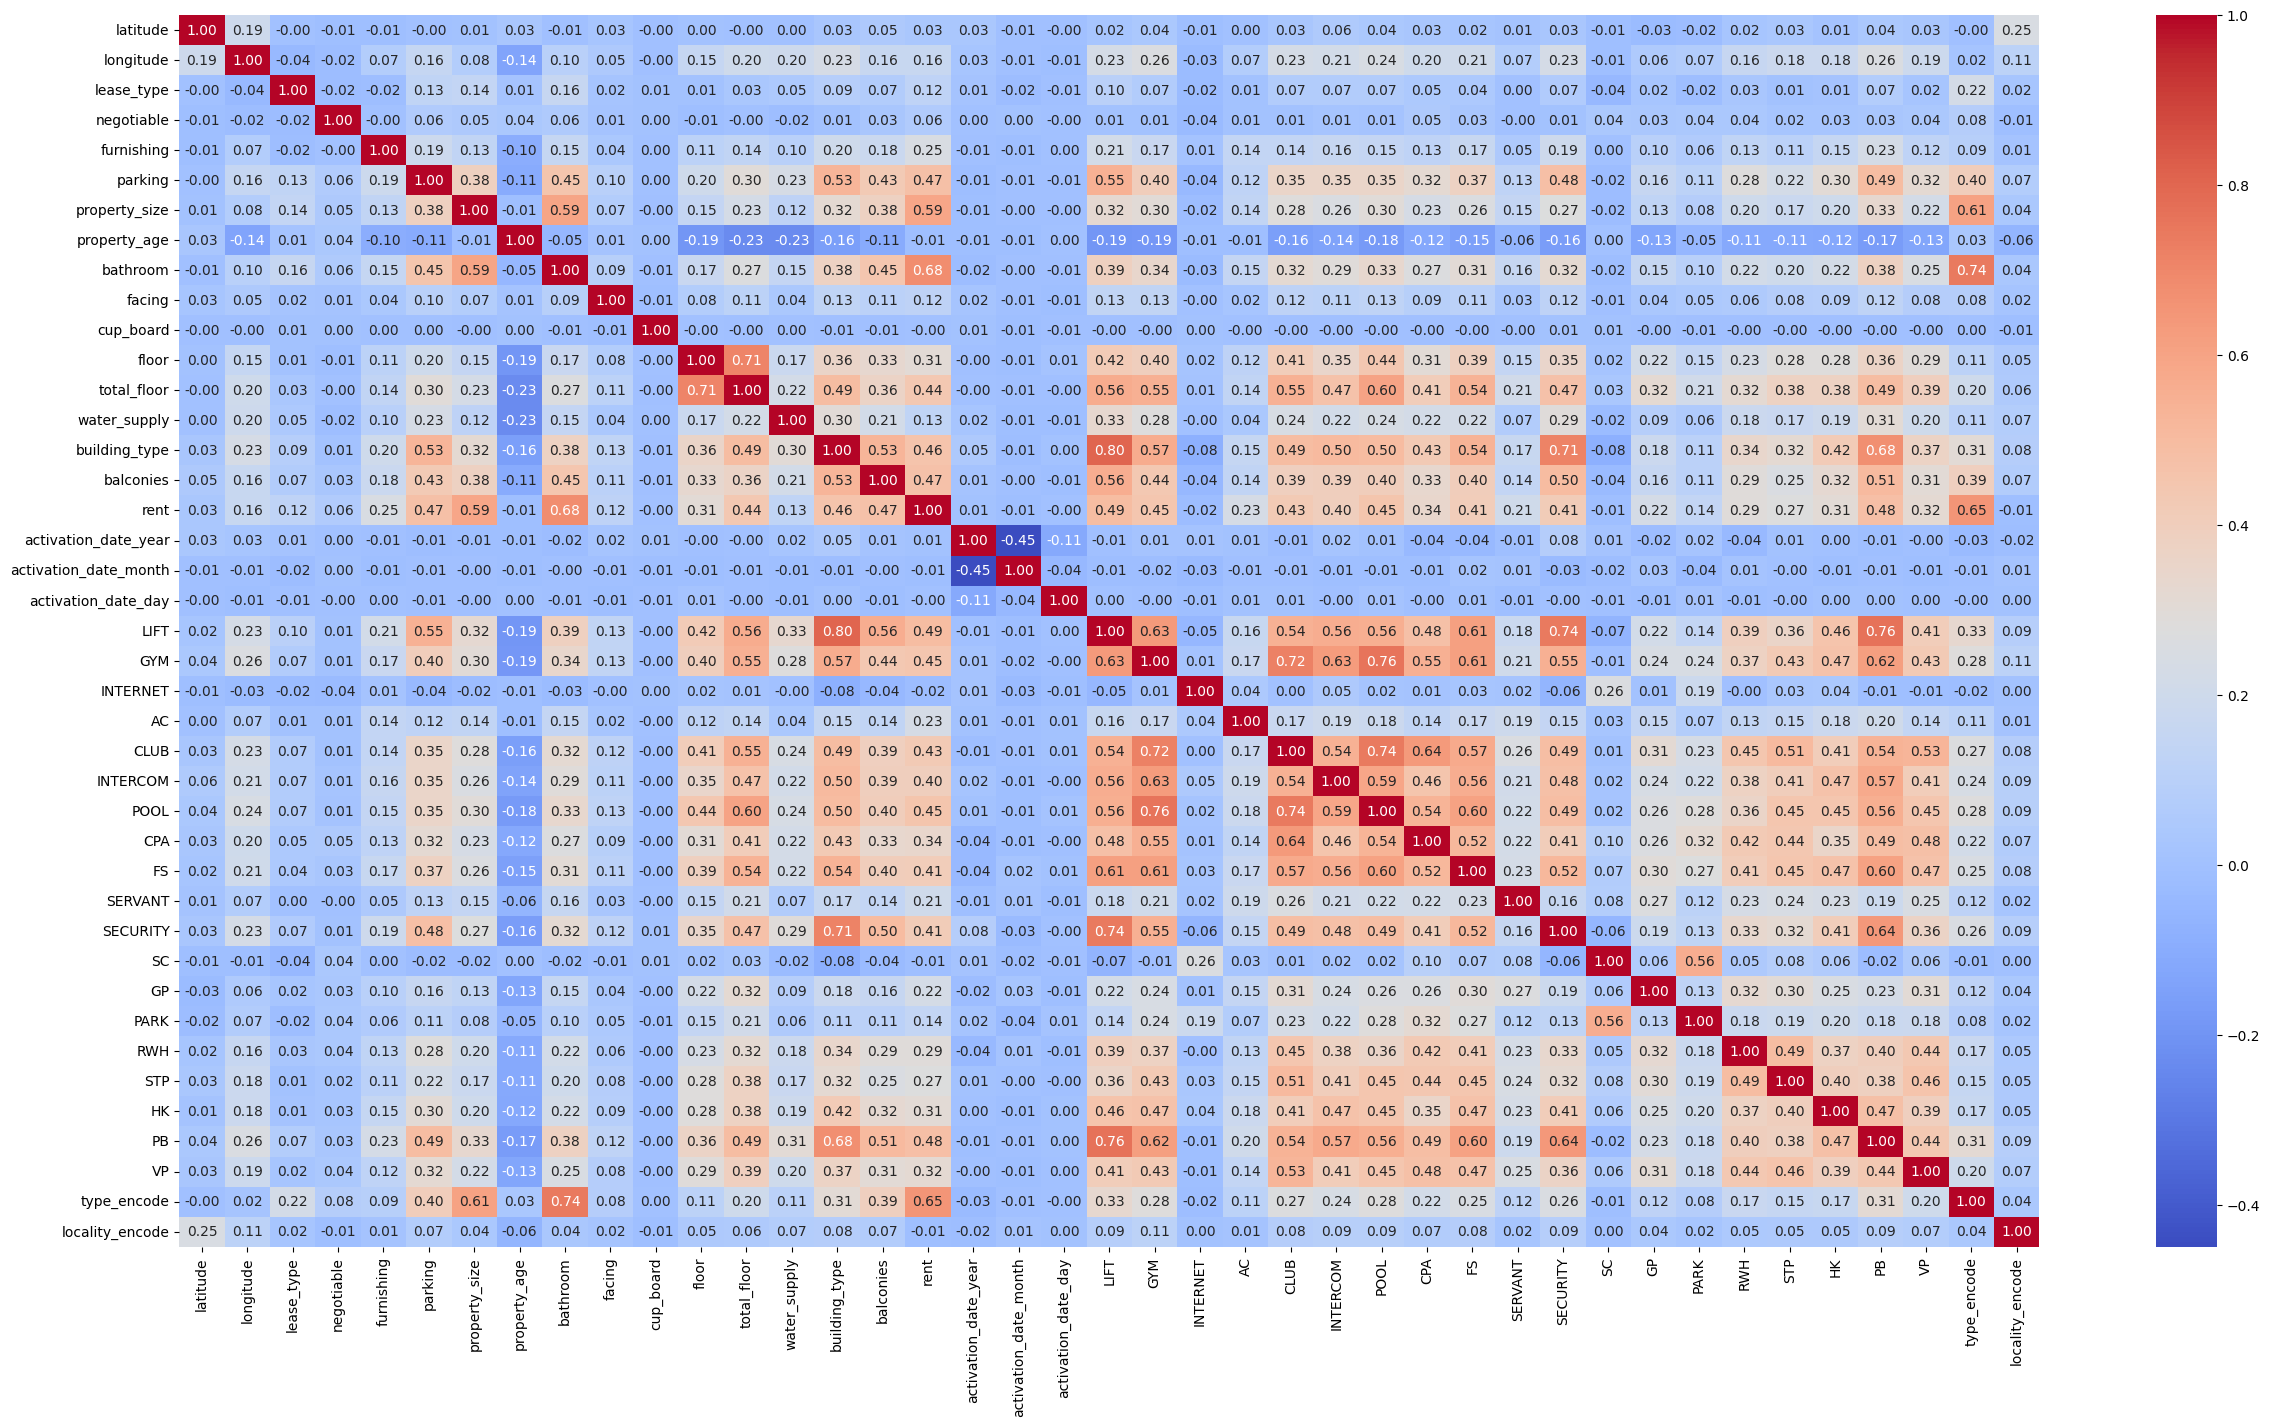

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize = (30,16))
sns.heatmap(cor, annot = True, fmt = ".2f", cmap = "coolwarm")

<Axes: xlabel='rent', ylabel='Count'>

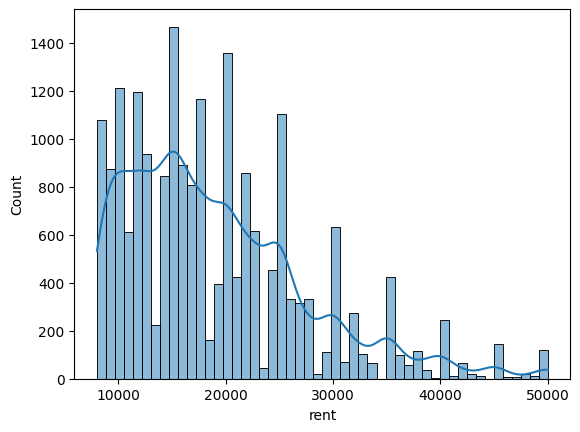

In [50]:
# Distribution of target variable (rent)
sns.histplot(df["rent"], kde = True)

<Axes: xlabel='rent', ylabel='Count'>

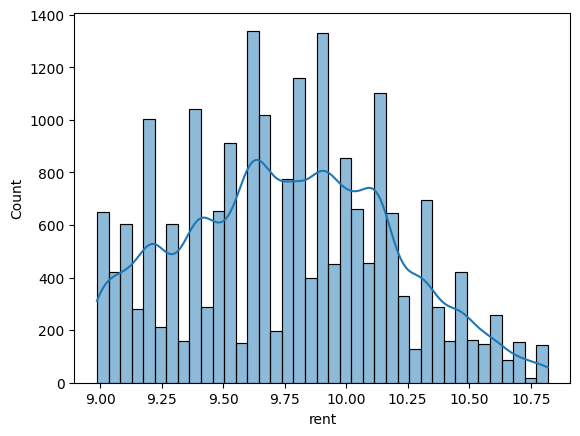

In [51]:
# using log transformation on the target variable
df["rent"] = df["rent"].apply(lambda x: np.log(x))

sns.histplot(df["rent"], kde = True)

# Saving the cleaned data in csv file format

In [52]:
df.to_csv("Cleaned_House_Rent_Train.csv", index = False, encoding = "utf-8-sig")

# doing all the same preprocessing steps for the test dataset below

In [53]:
# reading test dataset csv file
test_df = pd.read_excel("House_Rent_Test.xlsx")


In [54]:
# function for preprocessing steps
def preprocessing(df):

    df.dropna(inplace = True)
    df.drop_duplicates(inplace = True)
    df.reset_index(drop =True, inplace = True)

    df["activation_date"] = pd.to_datetime(df.loc[:, "activation_date"])
    df["activation_date_year"] = df.loc[:, "activation_date"].dt.year
    df["activation_date_month"] = df.loc[:, "activation_date"].dt.month
    df["activation_date_day"] = df.loc[:, "activation_date"].dt.day

    s = {'LIFT':[], 'GYM':[], 'INTERNET':[], 'AC':[], 'CLUB':[], 'INTERCOM':[], 'POOL':[], 'CPA':[], 'FS':[], 'SERVANT':[], 
     'SECURITY':[], 'SC':[], 'GP':[], 'PARK':[], 'RWH':[], 'STP':[], 'HK':[], 'PB':[], 'VP':[]}
    for row in df["amenities"].values:
        i = json.loads(row)
        s["LIFT"].append(i.get("LIFT", False))
        s["GYM"].append(i.get("GYM", False))
        s["INTERNET"].append(i.get("INTERNET", False))
        s["AC"].append(i.get("AC", False))
        s["CLUB"].append(i.get("CLUB", False))
        s["INTERCOM"].append(i.get("INTERCOM", False))
        s["POOL"].append(i.get("POOL", False))
        s["CPA"].append(i.get("CPA", False))
        s["FS"].append(i.get("FS", False))
        s["SERVANT"].append(i.get("SERVANT", False))
        s["SECURITY"].append(i.get("SECURITY", False))
        s["SC"].append(i.get("SC", False))
        s["GP"].append(i.get("GP", False))
        s["PARK"].append(i.get("PARK", False))
        s["RWH"].append(i.get("RWH", False))
        s["STP"].append(i.get("STP", False))
        s["HK"].append(i.get("HK", False))
        s["PB"].append(i.get("PB", False))
        s["VP"].append(i.get("VP", False))

    amenities_df = pd.DataFrame(s)
    for i in amenities_df.columns:
        amenities_df[f"{i}"] = amenities_df[f"{i}"].map({True: 1, False: 0})
    df = pd.concat([df, amenities_df], axis = 1)

    df["type_encode"] = df["type"].map({"RK1": 1, "BHK1": 2, "BHK2": 3, "BHK3": 4, "BHK4": 5, "BHK4PLUS":6 })
    df["locality_encode"] = le.fit_transform(df["locality"])
    df["lease_type"] = df["lease_type"].map({"BACHELOR": 1, "ANYONE": 2, "FAMILY": 3, "COMPANY": 4 })
    df["furnishing"] = df["furnishing"].map({"NOT_FURNISHED": 1, "SEMI_FURNISHED": 2, "FULLY_FURNISHED": 3})
    df["parking"] = df["parking"].map({"NONE": 1, "TWO_WHEELER": 2, "FOUR_WHEELER": 3, "BOTH": 4  })
    df["facing"] = df["facing"].map({"N": 1, "S": 2, "E": 3, "W": 4, "NE": 5, "NW": 6, "SE": 7, "SW": 8})
    df["water_supply"] = df["water_supply"].map({"CORPORATION": 1, "CORP_BORE": 2, "BOREWELL": 3})
    df["building_type"] = df["building_type"].map({"IF": 1, "IH": 2, "AP": 3, "GC": 4})
    
    # dropping unnecessary columns
    df.drop(columns = ["id", "activation_date", "gym", "lift", "swimming_pool"], inplace = True)

    return df

In [55]:
test_df = preprocessing(test_df)

In [56]:
# saving it to csv file
test_df.to_csv("Cleaned_House_Rent_Test.csv", index = False, encoding = "utf-8-sig")